In [4]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

# データの前処理
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# データセットのダウンロード
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
batch_size = len(train_dataset) // 10  # トレーニングデータの10分の1を1バッチとする

# DataLoaderの定義
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models

# データの前処理
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# データセットのダウンロード
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
batch_size = len(train_dataset) // 10  # トレーニングデータの10分の1を1バッチとする
num_classes = 10

# DataLoaderの定義
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# モデルの定義
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.resnet18 = models.resnet18(weights=True)
        num_features = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        x = self.resnet18(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet().to(device)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 学習の実行
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_loss += loss.item() * labels.size(0)
    train_loss /= train_total
    train_acc = train_correct / train_total
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch+1, num_epochs, train_loss, train_acc))


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/100], Loss: 2.1187, Accuracy: 0.2537
Epoch [2/100], Loss: 1.5172, Accuracy: 0.4650
Epoch [3/100], Loss: 1.2298, Accuracy: 0.5648
Epoch [4/100], Loss: 1.0699, Accuracy: 0.6200
Epoch [5/100], Loss: 0.9676, Accuracy: 0.6586
Epoch [6/100], Loss: 0.9000, Accuracy: 0.6850
Epoch [7/100], Loss: 0.8451, Accuracy: 0.7014
Epoch [8/100], Loss: 0.7991, Accuracy: 0.7182
Epoch [9/100], Loss: 0.7622, Accuracy: 0.7305
Epoch [10/100], Loss: 0.7340, Accuracy: 0.7400
Epoch [11/100], Loss: 0.7051, Accuracy: 0.7520
Epoch [12/100], Loss: 0.6855, Accuracy: 0.7584
Epoch [13/100], Loss: 0.6624, Accuracy: 0.7690
Epoch [14/100], Loss: 0.6417, Accuracy: 0.7741
Epoch [15/100], Loss: 0.6219, Accuracy: 0.7815
Epoch [16/100], Loss: 0.6062, Accuracy: 0.7868
Epoch [17/100], Loss: 0.5919, Accuracy: 0.7928
Epoch [18/100], Loss: 0.5781, Accuracy: 0.7951
Epoch [19/100], Loss: 0.5609, Accuracy: 0.8025
Epoch [20/100], Loss: 0.5493, Accuracy: 

Files already downloaded and verified
Label: 6


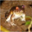

Label: 9


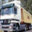

Label: 9


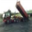

Label: 4


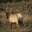

Label: 1


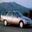

Label: 1


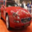

Label: 2


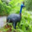

Label: 7


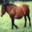

Label: 8


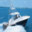

Label: 3


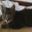

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from IPython.display import display

# CIFAR10のデータセットの読み込み
transform = transforms.Compose(
    [transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# 先頭10個のデータを表示
for i in range(10):
    image, label = cifar10[i]
    print('Label:', label)
    np_image = np.transpose(image.numpy(), (1, 2, 0))
    pil_image = Image.fromarray((np_image * 255).astype(np.uint8))
    display(pil_image)

In [9]:
image

tensor([[[0.4902, 0.4314, 0.4000,  ..., 0.7922, 0.7843, 0.7922],
         [0.5569, 0.5725, 0.6902,  ..., 0.7647, 0.7765, 0.8000],
         [0.7059, 0.5608, 0.6118,  ..., 0.4784, 0.5451, 0.6196],
         ...,
         [0.4078, 0.3961, 0.3961,  ..., 0.4941, 0.4941, 0.4902],
         [0.4078, 0.4118, 0.4275,  ..., 0.5412, 0.5373, 0.5373],
         [0.4118, 0.4235, 0.4510,  ..., 0.5608, 0.5608, 0.5647]],

        [[0.4902, 0.3961, 0.3529,  ..., 0.8118, 0.8039, 0.8157],
         [0.5725, 0.5647, 0.6745,  ..., 0.7882, 0.8039, 0.8275],
         [0.7255, 0.5725, 0.6157,  ..., 0.4353, 0.5020, 0.5765],
         ...,
         [0.3216, 0.3137, 0.3176,  ..., 0.4039, 0.4039, 0.3961],
         [0.3176, 0.3294, 0.3451,  ..., 0.4431, 0.4431, 0.4392],
         [0.3255, 0.3412, 0.3686,  ..., 0.4588, 0.4549, 0.4549]],

        [[0.4549, 0.3569, 0.3255,  ..., 0.8392, 0.8314, 0.8392],
         [0.5569, 0.5451, 0.6667,  ..., 0.8039, 0.8196, 0.8431],
         [0.7176, 0.5725, 0.6157,  ..., 0.4431, 0.5137, 0.